# Q2: Logistic Lasso Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, f1_score, balanced_accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Global seeds
np.random.seed(42)
random.seed(42)

In [3]:
# Load CSVs
X_train = pd.read_csv("X_train_scaled.csv")
X_test = pd.read_csv("X_test_scaled.csv")
y_train = pd.read_csv("y_train.csv")
y_test = pd.read_csv("y_test.csv")

## Q2.1 Lasso regression model

Fit a Lasso regression model with l1 regularization on the dataset.

Standardization (scaling features) is crucial before fitting a Lasso (L1-regularized) model. This ensures that all features are on the same scale, so the regularization penalty does not unfairly shrink features based only on their magnitude.
Without scaling, features with larger numeric ranges could dominate the model even if they are not truly more important.

In [8]:
def logistic_reg(X_train, X_test, y_train, y_test, penalty='l1', C=1.0, random_state=42, max_iter=10000):
    """
    Fits a Logistic Regression model, evaluates performance, plots feature importances and confusion matrix.

    Parameters:
    - X_train (pd.DataFrame): Training features
    - X_test (pd.DataFrame): Testing features
    - y_train (pd.Series or np.array): Training labels
    - y_test (pd.Series or np.array): Testing labels
    - penalty (str): Regularization type ('l1' or 'l2')
    - C (float): Inverse of regularization strength
    - random_state (int): Random seed
    - max_iter (int): Maximum iterations for solver

    Returns:
    - lasso_model (fitted model object)
    """
    # Fit model
    model = LogisticRegression(penalty=penalty, solver='saga', C=C, random_state=random_state, max_iter=max_iter)
    model.fit(X_train, y_train)

    # Predict
    y_pred = model.predict(X_test)

    # Evaluate
    f1 = f1_score(y_test, y_pred)
    balanced_acc = balanced_accuracy_score(y_test, y_pred)
    print(classification_report(y_test, y_pred))
    print(f"F1 Score: {f1:.4f}")
    print(f"Balanced Accuracy: {balanced_acc:.4f}")

    # Feature importances
    coef = model.coef_.flatten()
    feature_names = X_train.columns

    # Sort features by absolute coefficient value
    sorted_idx = np.argsort(np.abs(coef))
    sorted_coef = coef[sorted_idx]
    sorted_features = feature_names[sorted_idx]

    plt.figure(figsize=(12, 6))
    plt.barh(sorted_features, sorted_coef)
    plt.title('Feature Importances (Lasso Coefficients)')
    plt.xlabel('Coefficient Value')
    plt.ylabel('Feature')
    plt.axvline(0, color='black', linestyle='--')
    plt.tight_layout()
    plt.show()

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap="Blues")
    plt.title("Confusion Matrix")
    plt.show()

    return model

/cluster/courses/ml4h/project1env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


              precision    recall  f1-score   support

           0       0.80      0.74      0.77        74
           1       0.83      0.87      0.85       110

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184

F1 Score: 0.8533
Balanced Accuracy: 0.8080


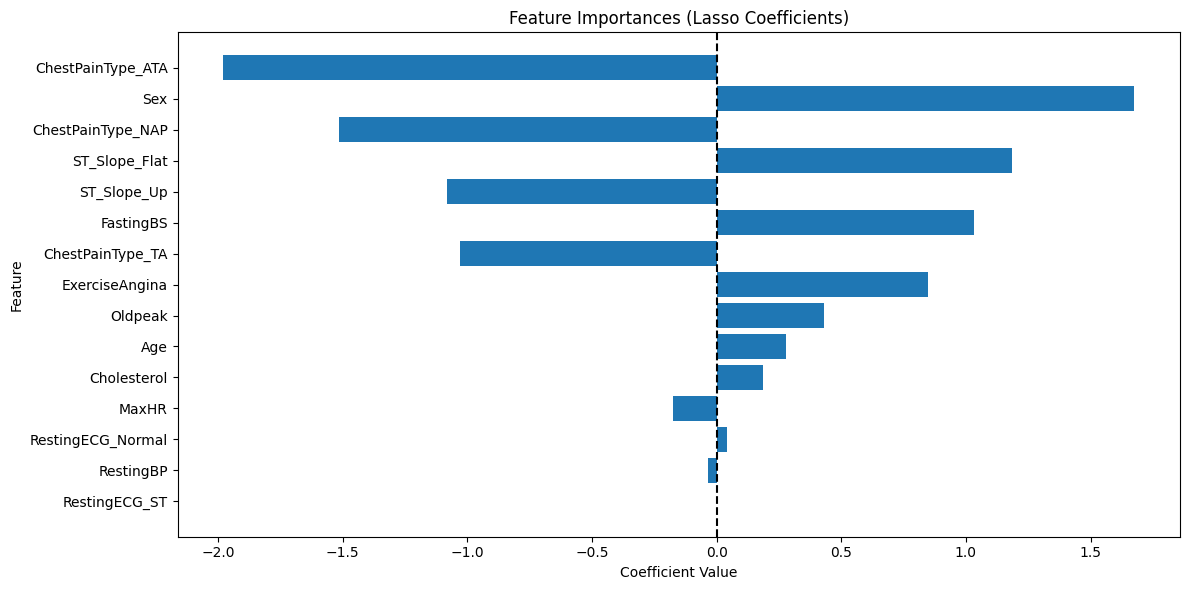

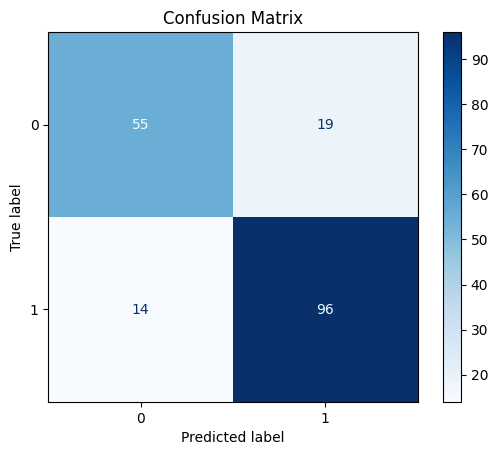

In [9]:
# Fit logistic regression and evaluate
lasso_model = logistic_reg(X_train, X_test, y_train, y_test)

Important features selected by Lasso:
['Age', 'Oldpeak', 'Sex', 'FastingBS', 'ExerciseAngina', 'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA', 'ST_Slope_Flat', 'ST_Slope_Up']
              precision    recall  f1-score   support

           0       0.81      0.74      0.77        74
           1       0.84      0.88      0.86       110

    accuracy                           0.83       184
   macro avg       0.82      0.81      0.82       184
weighted avg       0.83      0.83      0.82       184

F1 Score: 0.8584
Balanced Accuracy: 0.8125


/cluster/courses/ml4h/project1env/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


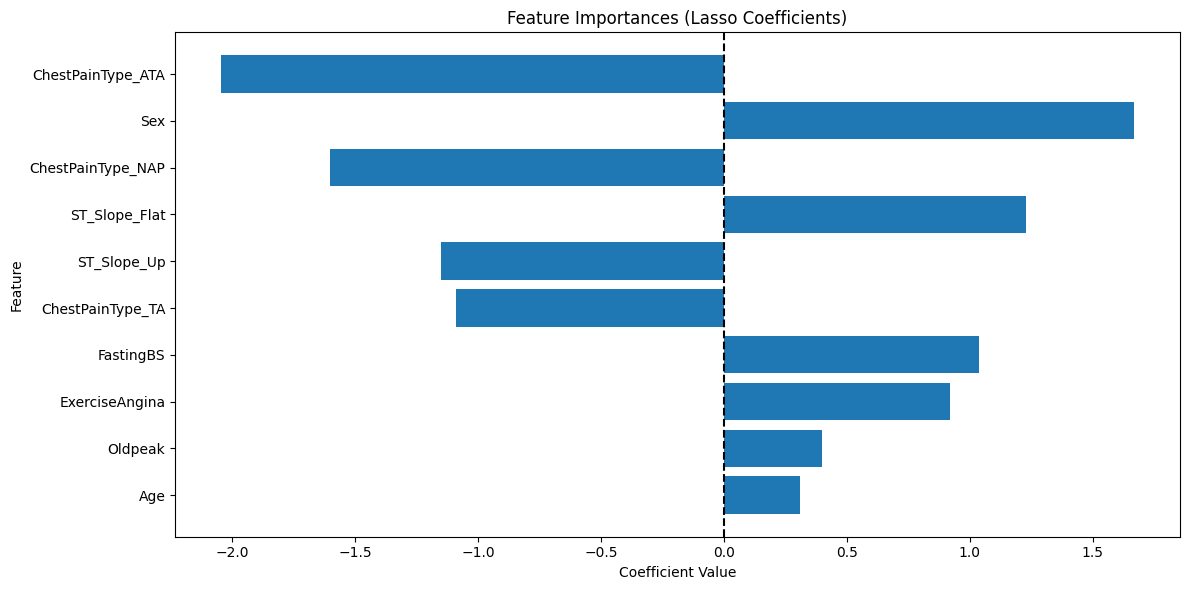

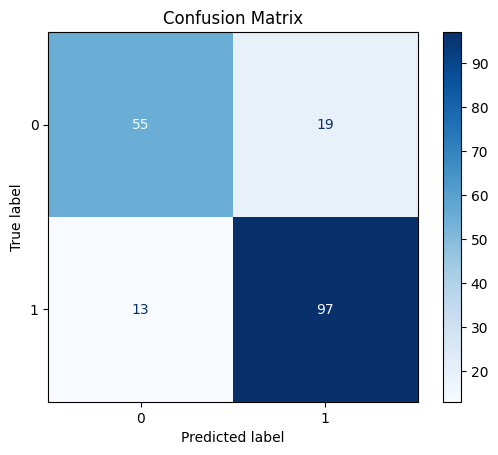

In [10]:
lasso_coef = lasso_model.coef_.flatten()
important_features = X_train.columns[np.abs(lasso_coef) > 0.2]  # threshold to remove numerical noise

print(f"Important features selected by Lasso:\n{important_features.tolist()}")

X_train_important = X_train[important_features]
X_test_important = X_test[important_features]

# Step 4: Fit unregularized logistic regression (or you can still use l2 if you want)
logistic_model = logistic_reg(X_train_important, X_test_important, y_train, y_test)  # no regularization
